In [1]:
import seaborn as sns
from statannotations.Annotator import Annotator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statannotations.stats.StatTest import StatTest

def sign_diff_CI(x_val,y_val):
    #print(x_val[:5],y_val[:5])
    lvls = [1e-4,1e-3,1e-2,0.05]+list(np.arange(0.1,1,0.05))
    lvl = 1
    
    if isinstance(x_val, pd.Series) and isinstance(y_val, pd.Series):
        diff = x_val.values-y_val.values
    elif isinstance(x_val, np.ndarray) and isinstance(y_val, np.ndarray): 
        diff = x_val-y_val
        
    for sig in lvls:
        up = np.quantile(diff, 1 - sig/2)
        low = np.quantile(diff, sig/2)
        if up*low > 0:
            lvl = sig
            break
            
    return np.nan, lvl


def count_diff_CI(x_val,y_val):
    
    if isinstance(x_val, pd.Series) and isinstance(y_val, pd.Series):
        diff = x_val.values-y_val.values
    elif isinstance(x_val, np.ndarray) and isinstance(y_val, np.ndarray): 
        diff = x_val-y_val
        
    lvl_val = np.mean(diff > 0)
    if lvl_val > 0.5:
        lvl_val = 1 - lvl_val
        
    return 1, lvl_val

def mapping(val):
    if val in ['lgb', 'svr','rf','mlp','ada']:
        return 'Feat2Lab'
    elif val in ['resnet1d','mlpbp','spectroresnet']:
        return 'Sig2Lab'
    elif val in ['unet1d','ppgiabp','vnet']:
        return 'Sig2Sig'
    
    return 'Feat2Lab'

custom_test = StatTest(sign_diff_CI, 'Diff confidence interval', 'Diff. CI')

In [2]:
f2l = ['lgb', 'svr','rf','mlp','ada']
s2l = ['resnet1d','spectroresnet','mlpbp']
s2s = ['unet1d','ppgiabp','vnet']

my_pal = {'lgb':'tab:blue', 'svr':'tab:blue','rf':'tab:blue','mlp':'tab:blue','ada':'tab:blue',
          'resnet1d':'tab:orange','mlpbp':'tab:orange','spectroresnet':'tab:orange',
          'unet1d':'tab:green','ppgiabp':'tab:green','vnet':'tab:green'}
            
algs = ['lgb', 'svr','rf','mlp','ada','resnet1d','spectroresnet','mlpbp','unet1d','ppgiabp','vnet']
algs_cool=['LightGBM','SVR','RF','MLP','AdaBoost','ResNet', 'Spectro','MLPBP','U-Net','PPGIABP','V-Net']
algs_dic = {a1:a2 for a1, a2 in zip(algs,algs_cool)}

In [3]:
df = pd.read_csv('./results/all_samp_res.csv')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

lgb vs. svr: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
svr vs. rf: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
resnet1d vs. spectroresnet: Diff confidence interval with Bonferroni correction, P_val:8.000e-02 Stat=nan
unet1d vs. ppgiabp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
svr vs. mlp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
resnet1d vs. mlpbp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
unet1d vs. vnet: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
svr vs. ada: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
p-value annotation legend:
      ns: p <= 1.00e+00
       *

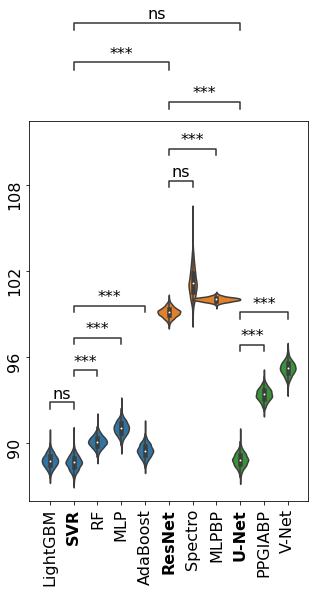

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

lgb vs. svr: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
svr vs. rf: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
spectroresnet vs. mlpbp: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
unet1d vs. ppgiabp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
svr vs. mlp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
resnet1d vs. mlpbp: Diff confidence interval with Bonferroni correction, P_val:8.000e-01 Stat=nan
unet1d vs. vnet: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
svr vs. ada: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1

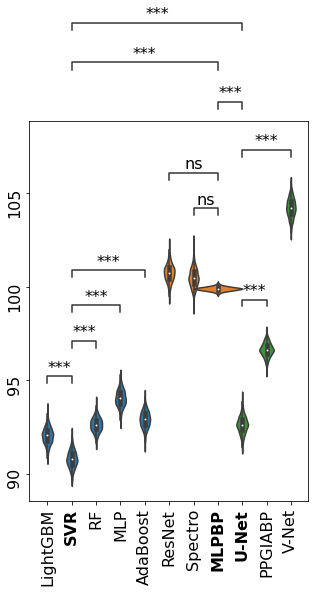

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

lgb vs. svr: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
resnet1d vs. spectroresnet: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
unet1d vs. ppgiabp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
lgb vs. rf: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
resnet1d vs. mlpbp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
unet1d vs. vnet: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
lgb vs. mlp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
lgb vs. ada: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
p-value annotation legend:
      ns: p <= 1.00e+00
       *

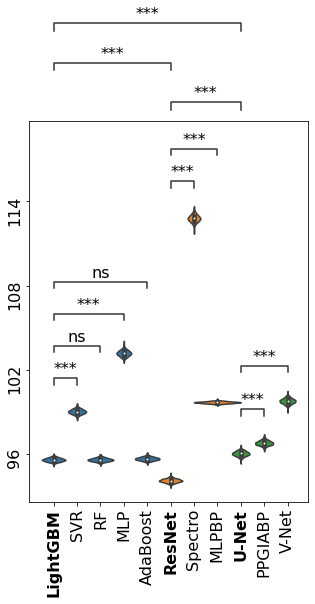

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

lgb vs. svr: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
svr vs. rf: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
resnet1d vs. spectroresnet: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
unet1d vs. ppgiabp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
svr vs. mlp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
resnet1d vs. mlpbp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
unet1d vs. vnet: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
svr vs. ada: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
p-value annotation legend:
      ns: p <= 1.00e+00
       *

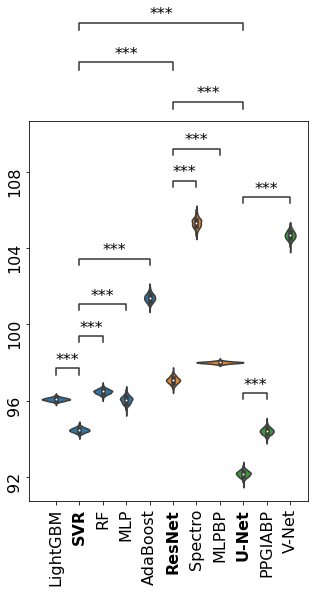

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mlp vs. ada: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
resnet1d vs. spectroresnet: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
ppgiabp vs. vnet: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
rf vs. ada: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
resnet1d vs. mlpbp: Diff confidence interval with Bonferroni correction, P_val:4.000e-01 Stat=nan
unet1d vs. vnet: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
svr vs. ada: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
lgb vs. ada: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 

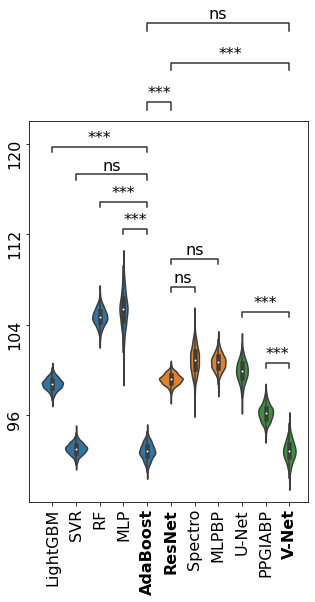

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

rf vs. mlp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
mlp vs. ada: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
resnet1d vs. spectroresnet: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
unet1d vs. ppgiabp: Diff confidence interval with Bonferroni correction, P_val:4.000e-01 Stat=nan
ppgiabp vs. vnet: Diff confidence interval with Bonferroni correction, P_val:8.000e-02 Stat=nan
svr vs. mlp: Diff confidence interval with Bonferroni correction, P_val:8.000e-03 Stat=nan
resnet1d vs. mlpbp: Diff confidence interval with Bonferroni correction, P_val:8.000e-02 Stat=nan
lgb vs. mlp: Diff confidence interval with Bonferroni correction, P_val:8.000e-04 Stat=nan
p-value annotation legend:
      ns: p <= 1.00e+00
       

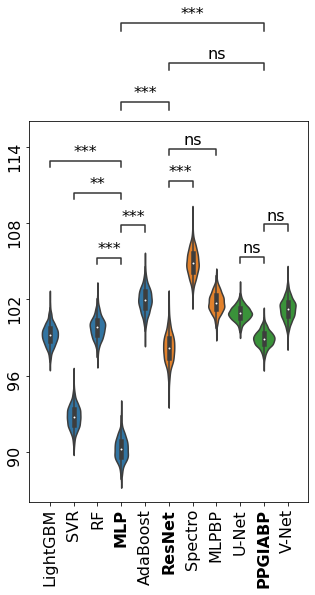

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

lgb vs. svr: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
resnet1d vs. spectroresnet: Diff confidence interval with Bonferroni correction, P_val:6.000e-04 Stat=nan
lgb vs. rf: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
resnet1d vs. mlpbp: Diff confidence interval with Bonferroni correction, P_val:6.000e-04 Stat=nan
lgb vs. mlp: Diff confidence interval with Bonferroni correction, P_val:9.000e-01 Stat=nan
lgb vs. ada: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

lgb vs. resnet1d: Diff confidence interval with Bonferroni correction, 

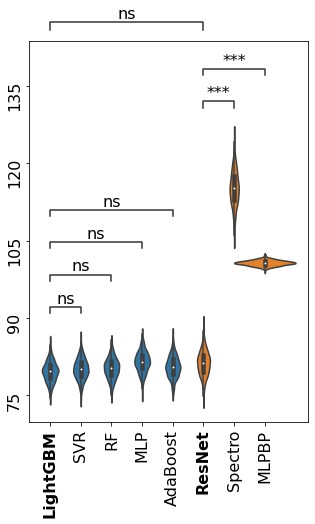

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mlp vs. ada: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
resnet1d vs. spectroresnet: Diff confidence interval with Bonferroni correction, P_val:6.000e-04 Stat=nan
rf vs. ada: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
resnet1d vs. mlpbp: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
svr vs. ada: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
lgb vs. ada: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ada vs. resnet1d: Diff confidence interval with Bonferroni correction, 

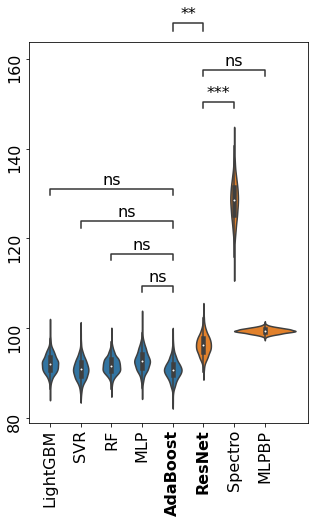

In [5]:
x = 'alg'
for db in ['sensors','uci2','bcg','ppgbp']:
    df_temp = df[df.db==db]
    for y in ['MASE_SP','MASE_DP']:
        # all comparisons
        order = f2l+s2l
        mean_val = df_temp.groupby('alg')[y].mean()
        b_f2l=mean_val[f2l].idxmin()
        b_s2l=mean_val[s2l].idxmin()
        comp_f2l = [(b_f2l, m) for m in f2l if m!=b_f2l]
        comp_s2l = [(b_s2l, m) for m in s2l if m!=b_s2l]
        comp = comp_f2l+comp_s2l
        if db !='ppgbp':
            order+=s2s
            b_s2s=mean_val[s2s].idxmin()
            comp_s2s = [(b_s2s, m) for m in s2s if m!=b_s2s]
            comp+=comp_s2s
            comp_b = [(b_f2l,b_s2l),(b_f2l,b_s2s),(b_s2l,b_s2s)]
        else:
            comp_b = [(b_f2l,b_s2l)]

        width = 2 if db!='bcg' else 1
        plt.figure(figsize=(5,7))
        ax=sns.violinplot(data=df_temp, x=x, y=y, order = order,showfliers = False, width=width, palette=my_pal)
        annotator = Annotator(ax, comp, data=df_temp, x=x, y=y, order=order, plot="violinplot")
        annotator.configure(test=custom_test, text_format='star', loc='inside', comparisons_correction='bonferroni', fontsize=16)
        annotator.apply_and_annotate()
        annotator.reset_configuration()


        # comparison of the best of each category
        annotator = Annotator(ax, comp_b, data=df_temp, x=x, y=y, order=order, plot="violinplot")
        annotator.configure(test=custom_test, text_format='star', loc='outside', comparisons_correction='bonferroni', fontsize=16)
        annotator.apply_and_annotate()

        plt.xticks(fontsize=16,rotation = 90)
        plt.yticks(fontsize=16,rotation = 90)
        plt.xlabel('')
        plt.ylabel('')
        
        
        #Cool and Bold ticks
        ax.set_xticklabels([algs_dic[a] for a in order])
        
        best_f2l =  df_temp.groupby('alg')[y].mean()[f2l].idxmin()
        ax.get_xticklabels()[order.index(best_f2l)].set_fontweight('bold')
        best_s2l =  df_temp.groupby('alg')[y].mean()[s2l].idxmin()
        ax.get_xticklabels()[order.index(best_s2l)].set_fontweight('bold')
        if db !='ppgbp': 
            best_s2s =  df_temp.groupby('alg')[y].mean()[s2s].idxmin()
            ax.get_xticklabels()[order.index(best_s2s)].set_fontweight('bold')
            
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        plt.savefig(f'./CI-plots/ci_{db}_{y}.pdf',format='pdf', bbox_inches='tight')
        plt.show()

1

In [ ]:
comp_f2l = []
for i in range(len(f2l)):
        for j in range(i+1,len(f2l)):
            comp_f2l+=[(f2l[i],f2l[j])]
            
comp_s2l = []
for i in range(len(s2l)):
        for j in range(i+1,len(s2l)):
            comp_s2l+=[(s2l[i],s2l[j])]
            
comp_s2s = []
for i in range(len(s2s)):
        for j in range(i+1,len(s2s)):
            comp_s2s+=[(s2s[i],s2s[j])]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

lgb vs. svr: Diff confidence interval with Bonferroni correction, P_val:1.000e+00 Stat=nan
svr vs. rf: Diff confidence interval with Bonferroni correction, P_val:1.400e-03 Stat=nan
rf vs. mlp: Diff confidence interval with Bonferroni correction, P_val:1.400e-01 Stat=nan
mlp vs. ada: Diff confidence interval with Bonferroni correction, P_val:1.400e-03 Stat=nan
resnet1d vs. mlpbp: Diff confidence interval with Bonferroni correction, P_val:1.400e-03 Stat=nan
unet1d vs. ppgiabp: Diff confidence interval with Bonferroni correction, P_val:1.400e-03 Stat=nan
ppgiabp vs. vnet: Diff confidence interval with Bonferroni correction, P_val:1.400e-03 Stat=nan
lgb vs. rf: Diff confidence interval with Bonferroni correction, P_val:1.400e-03 Stat=nan
svr vs. mlp: Diff confidence interval with Bonferroni correction, P_val:1.4

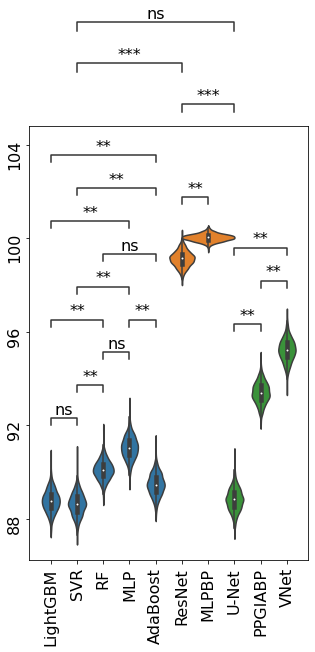

In [57]:
x = 'alg'
for db in ['sensors','uci2','bcg','ppgbp']:
    df_temp = df[df.db==db]
    for y in ['MASE_SP','MASE_DP']:
        # all comparisons
        comp = comp_f2l+comp_s2l
        order = f2l+s2l
        if db !='ppgbp':
            comp+=comp_s2s
            order+=s2s

        width = 2 if db!='bcg' else 1
        plt.figure(figsize=(5,8))
        ax=sns.violinplot(data=df_temp, x=x, y=y, order = order,showfliers = False, width=width, palette=my_pal)
        annotator = Annotator(ax, comp, data=df_temp, x=x, y=y, order=order, plot="violinplot")
        annotator.configure(test=custom_test, text_format='star', loc='inside', comparisons_correction='bonferroni', fontsize=16)
        annotator.apply_and_annotate()
        annotator.reset_configuration()


        # comparison of the best of each category
        mean_val = df_temp.groupby('alg')[y].mean()
        b_f2l=mean_val[f2l].idxmin()
        b_s2l=mean_val[s2l].idxmin()

        if db !='ppgbp':
            b_s2s=mean_val[s2s].idxmin()
            comp_b = [(b_f2l,b_s2l),(b_f2l,b_s2s),(b_s2l,b_s2s)]
        else:
            comp_b = [(b_f2l,b_s2l)]

        annotator = Annotator(ax, comp_b, data=df_temp, x=x, y=y, order=order, plot="violinplot")
        annotator.configure(test=custom_test, text_format='star', loc='outside', comparisons_correction='bonferroni', fontsize=16)
        annotator.apply_and_annotate()

        plt.xticks(fontsize=16,rotation = 90)
        plt.yticks(fontsize=16,rotation = 90)
        plt.xlabel('')
        plt.ylabel('')
        ax.set_xticklabels([algs_dic[a] for a in order])
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        #plt.savefig(f'./CI-plots/ci_{db}_{y}.pdf',format='pdf', bbox_inches='tight')
        plt.show()
        break
    break